# Examen P1
### Santiago Ismael Lopez Contreras
##### 744857

#### 1. ¿Qué información tenemos disponible para realizar el análisis? Describe el conjunto de datos. (20 pts)

La tabla que se otorga contiene datos del 2015 al 2022. Dentro de ella se tiene el estado, el bien juridico afectado, el tipo de delito que se cometio, el subtipo de este delito, la modalidad del delito y la cantidad de veces que se cometio a traves de los meses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crimen_mexico_2015_2022.csv',encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25088 entries, 0 to 25087
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     25088 non-null  int64  
 1   Clave_Ent               25088 non-null  int64  
 2   Entidad                 25088 non-null  object 
 3   Bien jurídico afectado  25088 non-null  object 
 4   Tipo de delito          25088 non-null  object 
 5   Subtipo de delito       25088 non-null  object 
 6   Modalidad               25088 non-null  object 
 7   Enero                   25088 non-null  int64  
 8   Febrero                 25088 non-null  int64  
 9   Marzo                   25088 non-null  int64  
 10  Abril                   25088 non-null  int64  
 11  Mayo                    25088 non-null  int64  
 12  Junio                   21952 non-null  float64
 13  Julio                   21952 non-null  float64
 14  Agosto                  21952 non-null

In [2]:
columnas_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df['Total_Meses'] = df[columnas_meses].sum(axis=1)

#total total
tot_anio = df.groupby(['Año'])['Total_Meses'].sum()
#print(tot_anio)
# Desglosa por esato
tot_anio_ent = df.groupby(['Año','Entidad'])['Total_Meses'].sum()
#print(tot_anio_ent)

totales_por_entidad = df.groupby('Entidad')[columnas_meses].sum()
#totales_por_entidad.info()
totales_por_entidad['Total'] = totales_por_entidad.sum(axis=1)
totales_por_entidad = totales_por_entidad.sort_values('Total', ascending=False)
tot_ent_men = totales_por_entidad.sort_values('Total', ascending=True)
#print(tot_ent_men)
#print(totales_por_entidad)

totales_tipo = df.groupby('Tipo de delito')[columnas_meses].sum()
totales_tipo['Total'] = totales_tipo.sum(axis=1)
totales_tipo = totales_tipo.sort_values('Total', ascending=False)
totales_tipo_10 = totales_tipo.head(15)
#print(totales_tipo_10['Total'])

# HOMICIDIO
df_hom = df[df['Tipo de delito'] == 'Homicidio']
df_hom['Total_Meses'] = df_hom[columnas_meses].sum(axis=1)
tot_hom_mes = df_hom[columnas_meses].sum()
prom_homicidios = tot_hom_mes / df['Año'].nunique()
print(prom_homicidios)

Enero         3282.375
Febrero       3142.375
Marzo         3480.250
Abril         3381.875
Mayo          3574.000
Junio         2880.125
Julio         2987.625
Agosto        3026.625
Septiembre    2942.000
Octubre       3014.875
Noviembre     2956.125
Diciembre     3115.125
dtype: float64


C:\Users\santl\AppData\Local\Temp\ipykernel_14304\1283938100.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hom['Total_Meses'] = df_hom[columnas_meses].sum(axis=1)


Graficas

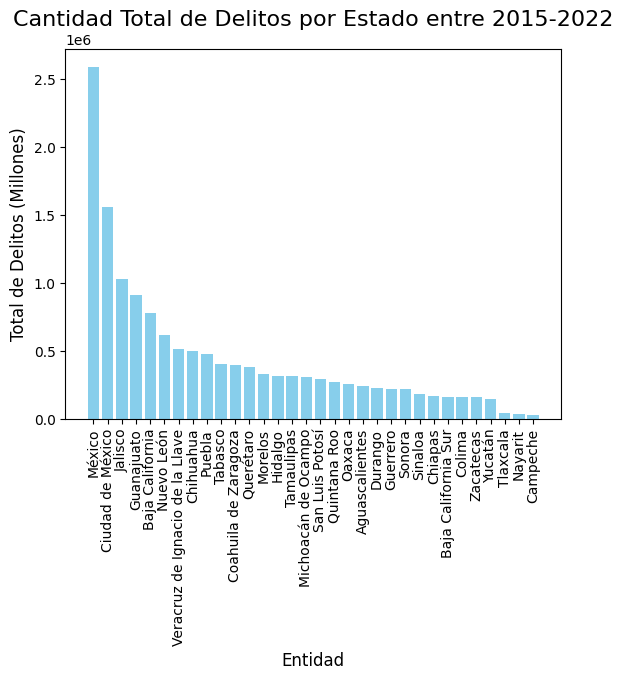

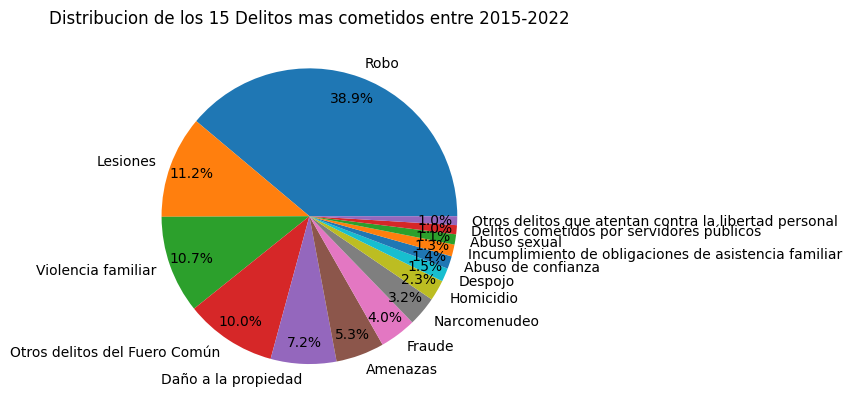

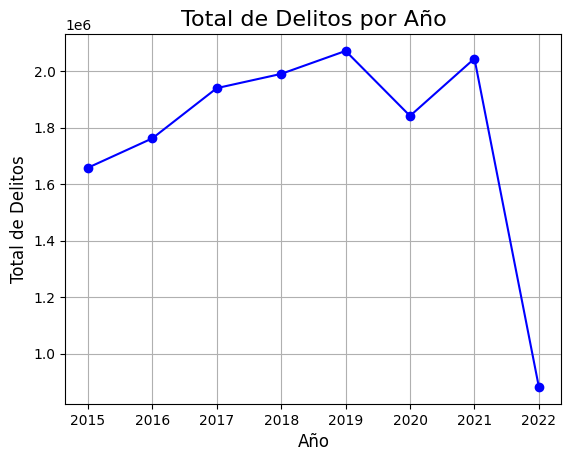

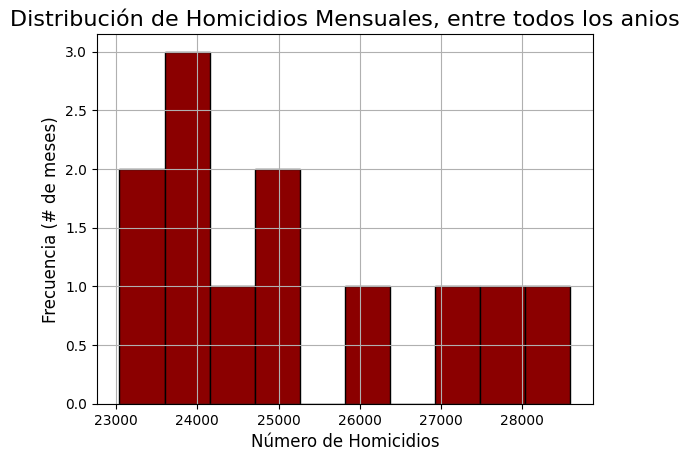

In [3]:
# BARRAS
plt.bar(totales_por_entidad.index, totales_por_entidad['Total'], color='skyblue')
plt.title('Cantidad Total de Delitos por Estado entre 2015-2022', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total de Delitos (Millones)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# PIE
plt.pie(totales_tipo_10['Total'],
        labels=totales_tipo_10.index,
        autopct='%1.1f%%',
        pctdistance=0.85)
plt.title('Distribucion de los 15 Delitos mas cometidos entre 2015-2022')
plt.show()

#LINEAS
# Dibujar la línea con el total de delitos por año
plt.plot(tot_anio.index, tot_anio, label='Total de Delitos', color='blue', marker='o')
plt.title('Total de Delitos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Delitos', fontsize=12)
plt.grid(True)
plt.show()

#HISTOGRAMA
plt.hist(tot_hom_mes, bins=10, color='darkred', edgecolor='black')
plt.title('Distribución de Homicidios Mensuales, entre todos los anios', fontsize=16)
plt.xlabel('Número de Homicidios', fontsize=12)
plt.ylabel('Frecuencia (# de meses)', fontsize=12)
plt.grid(True)
plt.show()

#SCATTER


### Notas de las graficas
En la de 'Total Delitos por Anio', existe una caida en el 2022 debido a que los datos solo llegan al mes de Mayo en ese anio

#### 3. ¿Cuáles son los 5 estados con mayor problema de criminalidad?
El codigo que se encuentra arriba organiza de manera descendente los datos, mostrando primero los que mas delitos tienen. Se toma la criminalidad como el total de delitos cometidos. A mayor cantidad, se considera mayor criminalidad. En este caso, son:
1. Mexico
2. Ciudad de Mexico
3. Jalisco
4. Guanajuato
5. Baja California

In [4]:
totales_por_entidad = totales_por_entidad.head(5)
print(totales_por_entidad)

                   Enero  Febrero   Marzo   Abril    Mayo     Junio     Julio  \
Entidad                                                                         
México            215242   221009  246345  233679  245024  200421.0  199974.0   
Ciudad de México  130160   132168  147815  133940  141390  119853.0  123118.0   
Jalisco            90301    84446   92572   86945   89705   83818.0   84491.0   
Guanajuato         79422    77632   85813   80040   84602   69875.0   70060.0   
Baja California    67880    64201   72511   68920   71221   61531.0   63718.0   

                    Agosto  Septiembre   Octubre  Noviembre  Diciembre  \
Entidad                                                                  
México            207341.0    204759.0  216448.0   201837.0   197877.0   
Ciudad de México  126236.0    122852.0  132593.0   124120.0   119797.0   
Jalisco            84832.0     79795.0   87850.0    81426.0    80549.0   
Guanajuato         72622.0     71286.0   74807.0    69350.0   

#### 4. ¿Cuál es el bien jurídico que tuvo mayor afectación en los años 2021 y 2022?
El bien juridico mas afectado es el patrimonio de las personas

In [5]:
tot_jur = df.groupby('Bien jurídico afectado')[columnas_meses].sum()
tot_jur['Total'] = tot_jur.sum(axis=1)
tot_jur = tot_jur.sort_values('Total', ascending=False)
print(tot_jur)

                                                     Enero  Febrero   Marzo  \
Bien jurídico afectado                                                        
El patrimonio                                       635678   615713  667625   
Otros bienes jurídicos afectados (del fuero común)  242616   250926  278658   
La vida y la Integridad corporal                    149363   152982  176812   
La familia                                          129608   138866  164572   
La libertad y la seguridad sexual                    26626    30348   37367   
Libertad personal                                    11665    11743   12995   
La sociedad                                           5537     5720    6260   

                                                     Abril    Mayo     Junio  \
Bien jurídico afectado                                                         
El patrimonio                                       615159  639351  562660.0   
Otros bienes jurídicos afectados (del fuero comú

#### 5. ¿Qué impacto tuvo la pandemia del COVID-19 en el problema de criminalidad?
En el 2020, anio del auge de la pandemia, los delitos disminuyeron aproximadamente 200 mil


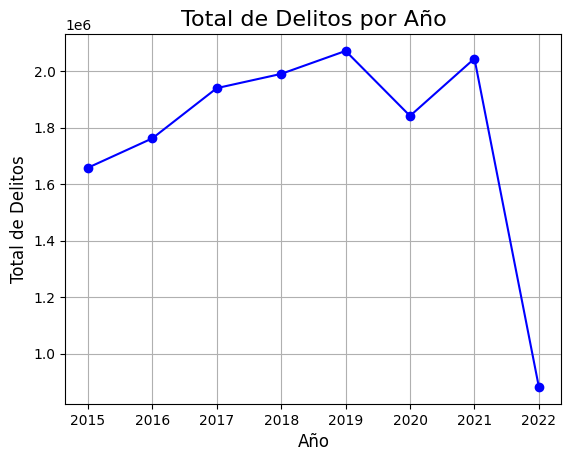

In [6]:
plt.plot(tot_anio.index, tot_anio, label='Total de Delitos', color='blue', marker='o')
plt.title('Total de Delitos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Delitos', fontsize=12)
plt.grid(True)
plt.show()

#### 6. ¿Cuáles son los 5 estados con menor problema de criminalidad? (10 pts)
El codigo que se encuentra arriba organiza de manera ascendente los datos, mostrando primero los que menos delitos tienen. Se toma la criminalidad como el total de delitos cometidos. A menor cantidad, se considera menor criminalidad. En este caso, son:
1. Campeche
2. Nayarit
3. Tlaxcala
4. Yucatan
5. Zacatecas

In [7]:
print(tot_ent_men.head(5))

           Enero  Febrero  Marzo  Abril   Mayo    Junio    Julio   Agosto  \
Entidad                                                                     
Campeche    3160     3092   3580   3177   3130   1194.0   1225.0   1223.0   
Nayarit     3077     3455   3555   3129   3600   2836.0   2392.0   2750.0   
Tlaxcala    4065     3945   4154   3777   3757   3335.0   3398.0   3536.0   
Yucatán    13147    12710  14600  13585  13646  11574.0  11141.0  10113.0   
Zacatecas  13139    13395  14674  13535  14846  12864.0  11919.0  12558.0   

           Septiembre  Octubre  Noviembre  Diciembre     Total  
Entidad                                                         
Campeche       1200.0   1350.0     2967.0     2982.0   28280.0  
Nayarit        2711.0   2683.0     2608.0     2062.0   34858.0  
Tlaxcala       3366.0   3488.0     3335.0     3323.0   43479.0  
Yucatán        9978.0  10824.0    10149.0    10170.0  141637.0  
Zacatecas     12305.0  12852.0    12013.0    11296.0  155396.0  


#### 7. ¿Cuál es la tendencia en el tiempo del problema de criminalidad? (30 pts)

a. A nivel nacional

b. En el estado con mayor problema

c. En el estado con menor problema

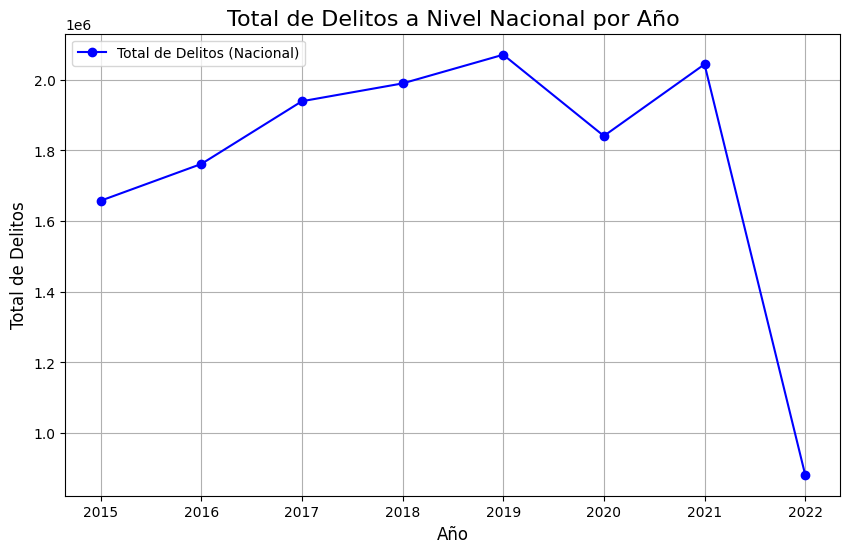

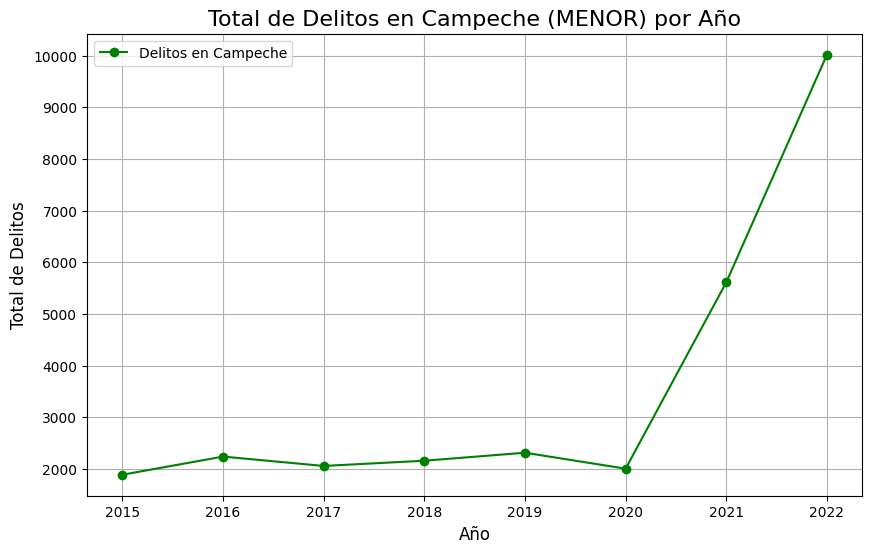

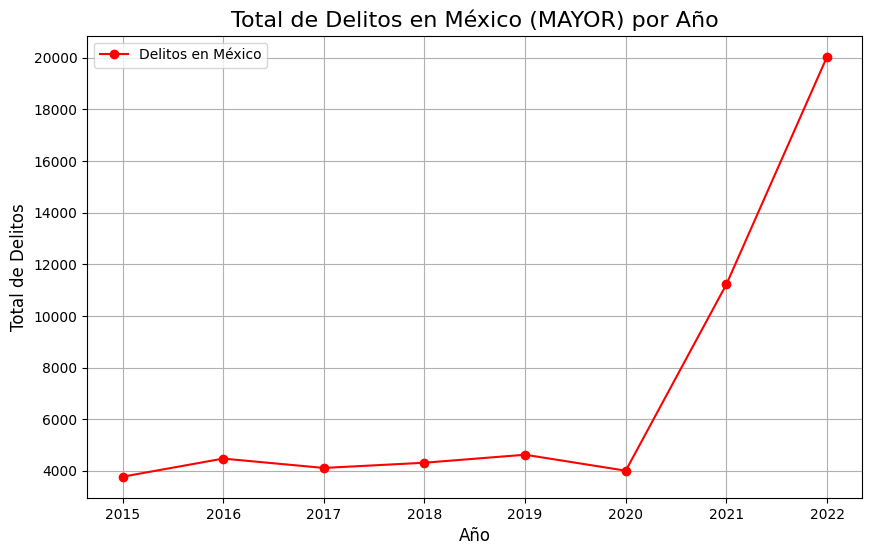

In [8]:
# ENTIDAD MAYOR
df_campeche = df[df['Entidad'] == 'Campeche']
tot_campeche_anio = df_campeche.groupby('Año')[columnas_meses].sum()
tot_campeche_anio['Total'] = tot_campeche_anio.sum(axis=1)

df_mexico = df[df['Entidad'] == 'Mexico']
tot_mexico_anio = df_mexico.groupby('Año')[columnas_meses].sum()
tot_mexico_anio['Total'] = tot_campeche_anio.sum(axis=1)

# NACIONAL
plt.figure(figsize=(10, 6))
plt.plot(tot_anio.index, tot_anio, label='Total de Delitos (Nacional)', color='blue', marker='o')
plt.title('Total de Delitos a Nivel Nacional por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Delitos', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# CAMPECHE
plt.figure(figsize=(10, 6))
plt.plot(tot_campeche_anio.index, tot_campeche_anio['Total'], label='Delitos en Campeche', color='green', marker='o')
plt.title('Total de Delitos en Campeche (MENOR) por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Delitos', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# MEXICO
plt.figure(figsize=(10, 6))
plt.plot(tot_mexico_anio.index, tot_mexico_anio['Total'], label='Delitos en México', color='red', marker='o')
plt.title('Total de Delitos en México (MAYOR) por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Delitos', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


